# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$


### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


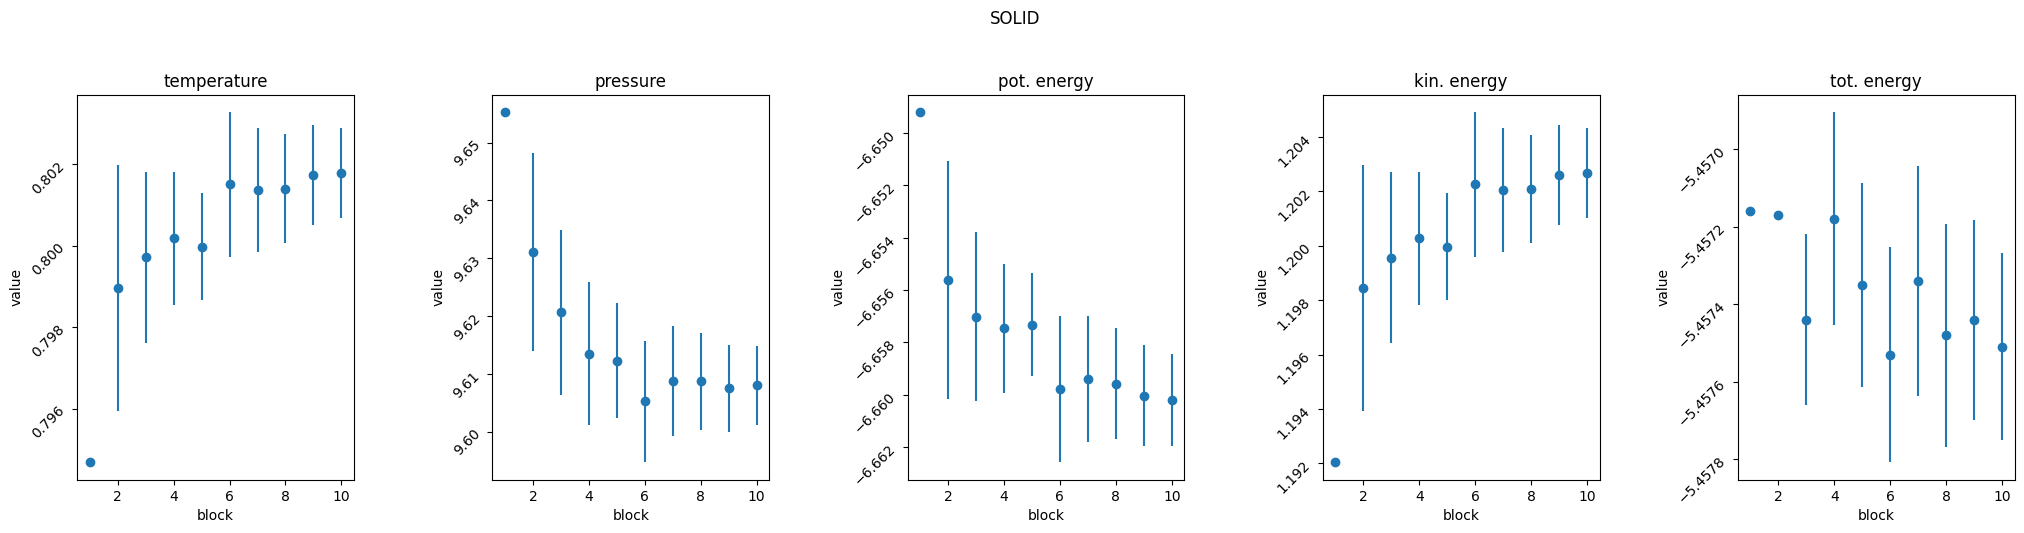

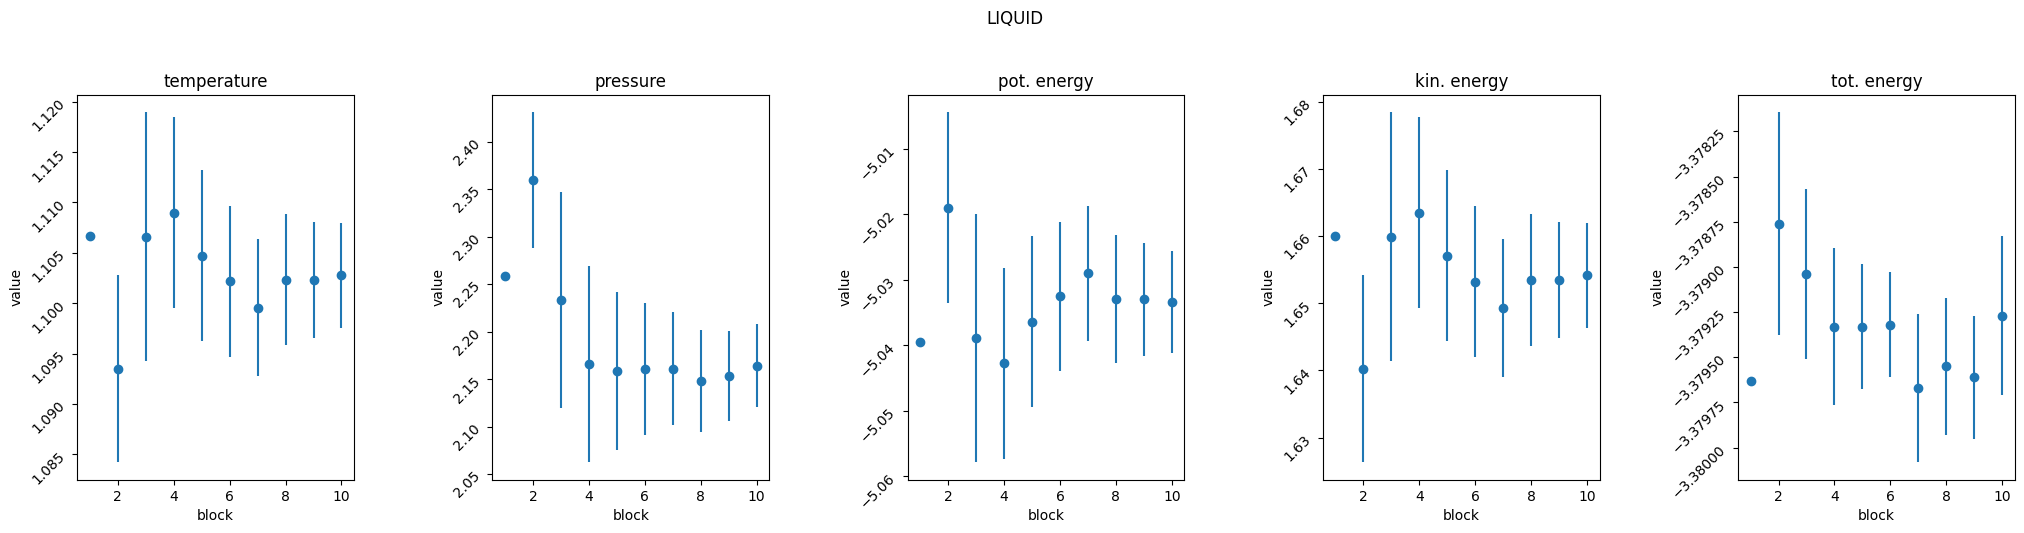

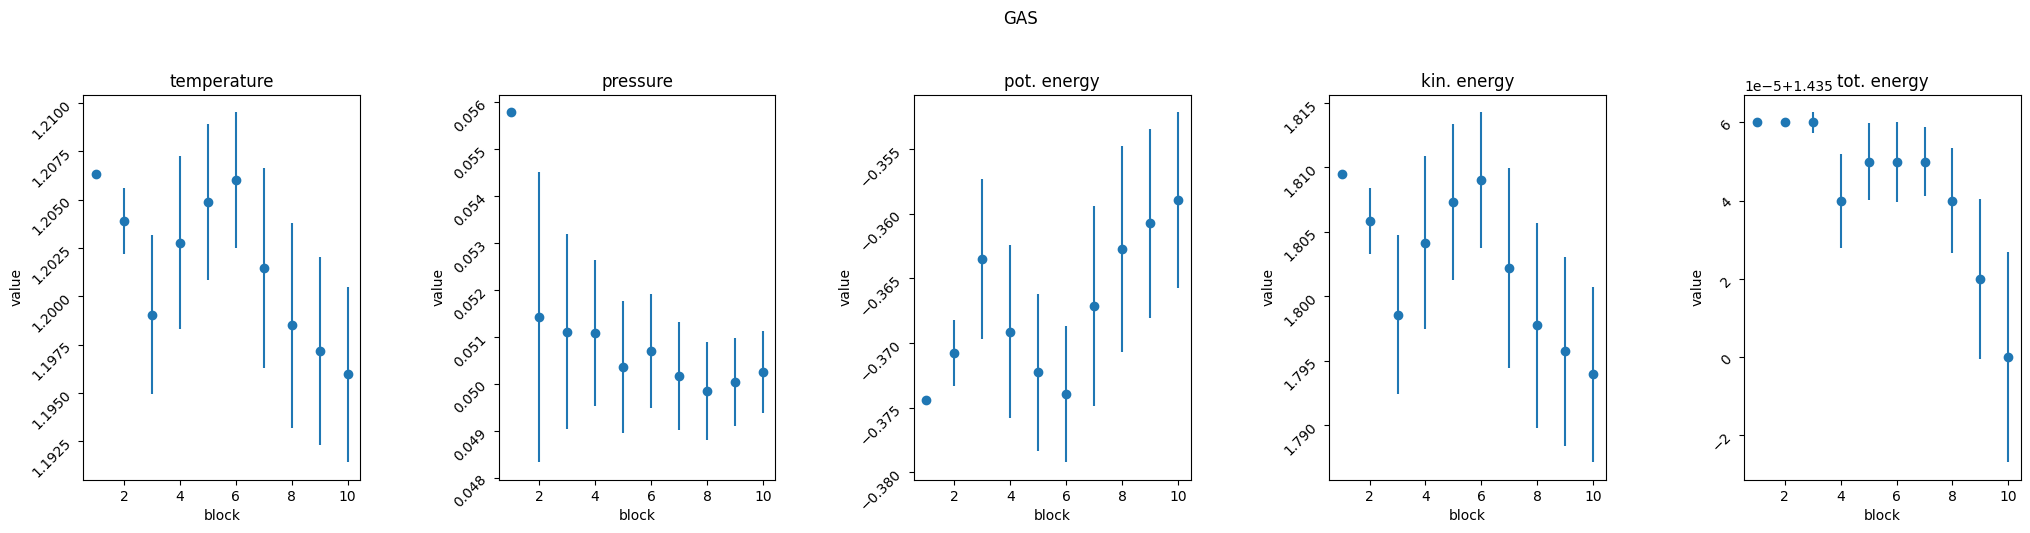

In [1]:
import numpy as np
import matplotlib.pyplot as plt

files = ['solid_temp.dat', 'solid_pres.dat', 'solid_pot.dat', 'solid_kin.dat', 'solid_tot.dat']

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, file in enumerate(files):
    data = np.loadtxt(file, comments='#')
    x = data[:, 0]
    y = data[:, 2]
    y_err = data[:, 3]
    
    axs[i].errorbar(x, y, yerr=y_err, fmt='o', label='Data')
    axs[0].set_title('temperature')
    axs[1].set_title('pressure')
    axs[2].set_title('pot. energy')
    axs[3].set_title('kin. energy')
    axs[4].set_title('tot. energy')
    axs[i].set_xlabel('block')
    axs[i].set_ylabel('value')
    axs[i].tick_params(axis='y', rotation=45)  # Ruota i tick dell'asse y
    
plt.subplots_adjust(wspace=0.5)  # Aggiunge spazio tra i grafici
fig.suptitle('SOLID', y=1.05)
plt.show()

files = ['liquid_temp.dat', 'liquid_pres.dat', 'liquid_pot.dat', 'liquid_kin.dat', 'liquid_tot.dat']

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, file in enumerate(files):
    data = np.loadtxt(file, comments='#')
    x = data[:, 0]
    y = data[:, 2]
    y_err = data[:, 3]
    
    axs[i].errorbar(x, y, yerr=y_err, fmt='o', label='Data')
    axs[0].set_title('temperature')
    axs[1].set_title('pressure')
    axs[2].set_title('pot. energy')
    axs[3].set_title('kin. energy')
    axs[4].set_title('tot. energy')
    axs[i].set_xlabel('block')
    axs[i].set_ylabel('value')
    axs[i].tick_params(axis='y', rotation=45)  # Ruota i tick dell'asse y
    
plt.subplots_adjust(wspace=0.5)  # Aggiunge spazio tra i grafici
fig.suptitle('LIQUID', y=1.05)
plt.show()

files = ['gas_temp.dat', 'gas_pres.dat', 'gas_pot.dat', 'gas_kin.dat', 'gas_tot.dat']

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, file in enumerate(files):
    data = np.loadtxt(file, comments='#')
    x = data[:, 0]
    y = data[:, 2]
    y_err = data[:, 3]
    
    axs[i].errorbar(x, y, yerr=y_err, fmt='o', label='Data')
    axs[0].set_title('temperature')
    axs[1].set_title('pressure')
    axs[2].set_title('pot. energy')
    axs[3].set_title('kin. energy')
    axs[4].set_title('tot. energy')
    axs[i].set_xlabel('block')
    axs[i].set_ylabel('value')
    axs[i].tick_params(axis='y', rotation=45)  # Ruota i tick dell'asse y
    
plt.subplots_adjust(wspace=0.5)  # Aggiunge spazio tra i grafici
fig.suptitle('GAS', y=1.05)
plt.show()



### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

L'algoritmo di Verlet conserva l'energia totale: questa cosa è confermata dai dati ottenuti (le fluttuazioni dell'energia totale sono esigue).
Tuttavia, evidentemente, l'energia potenziale e cinetica singolarmente non rimangono costanti.
Il senso dell'equilibrazione è il fatto che all'inizio la simulazione parte da una configurazione fcc cristallina che non è, evidentemente, quella dei casi di interesse (almeno, per quanto riguarda il gas e il liquido). Successivamente, l'energia potenziale e cinetica variano in modo da raggiungere la configurazione in esame. Poichè l'energia cinetica  è proporzionale alla temperatura, quest'ultima, in questa fase, varia a sua volta fino a raggiungere una condizione di equilibrio: per questo la temperatura di input è diversa da quella di target.

L'equilibrazione è stata ottenuta tramite la funzione EQUILIBRIUM.
Tale funzione è stata usata per monitorare la temperatura al fine di capire dopo quanti steps la simulazione è in equilibrio.
Una volta capito ciò, l'equilibrazione è stata performata tramite degli steps (in numero pari a quello identificato con equilibrium).